# Roundoff error

When a floating point number is converted to an integer, this always causes rounding error. By default in most programming languages if you immediately set a float to an integer it will *always round down*, so for instance 1.9 will become 1. This is called **casting**. On the other hand, if you specifically tell a programming language to round, it will do the usual rounding up or down.

In [1]:
#Example cast
x = 1.9
print "x = ",x
print "casting: int(x) = ", int(x)
print "rounding: round(x) = ", round(x)

x =  1.9
casting: int(x) =  1
rounding: round(x) =  2.0


By default, the matlab mean() function acts just like in python (the language I'm using here), which returns a *float*, or something with a decimal. This is also known as a *numeric* in some other programming languages.

In [2]:
#Common computations are calculated in this module, called numpy
#Just ignore this line
import numpy as np
np.random.seed(1234567)

#Create an array of 30 random integers between 0 and 10
x = np.random.randint(0, 10, 30)
print x
#Calculate the mean
mean = np.mean(x)
print "mean(x) = ", mean
print "int(mean)", int(mean)
print "round(mean)", round(mean)

[3 4 6 5 2 0 0 3 0 2 5 3 2 7 4 7 6 3 1 0 7 6 4 6 0 8 0 2 9 2]
mean(x) =  3.56666666667
int(mean) 3
round(mean) 4.0


It is very likely that you are using a cast instead of a round, since I think what you are acutally doing is doing integer division (i.e. dividing a sum of integers by an integer automatically does a cast):

In [3]:
#Integer division does a cast by default
print sum(x)/len(x)

3


Therefore, in the **worst case** each of your "mean pixel" values are off by 1 (or 0.999999 but w/e). Now you can ask, how much does this really matter for the final data product? Let's see.

Each of your pixel values $p\in(G,R,B)$ goes from 0 to 256. The greenness ($f$) is given by:

$f(G,R,B) = \frac{G}{G+R+B} = \frac{G}{\sum_i p_i} = G/T$
where $T = G+R+B$.

By propogation of errors, we know that:

$\sigma_f = \sqrt{\sum_i\sigma_i^2\left(\frac{df}{dp_i}\right)^2}$.

Let's assume the worst case and pretend that $\sigma_i=1$, meaning that each $p_i$ value is off by 1. Therefore, we see that:

$\sigma_f = \sqrt{\frac{1}{T^2} +\frac{2G}{T^3} + \frac{3G^2}{T^4}}$,
and now we can make plots of $f$ and $\sigma_f$.

In [4]:
#Define a function for f
def f_function(G, R, B):
    return G/(G+R+B)

#Define a function for sigmaf
#Note, exponents in python are the ** operator instead of ^
def sigmaf_function(G, R, B):
    T = G+R+B
    return np.sqrt(1./T**2 + G*2./T**3 + G**2.*3./T**4)

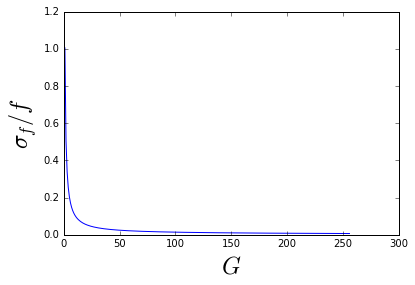

In [5]:
#To make plots we use this. Ignore the next two lines
import matplotlib.pyplot as plt
%matplotlib inline

#Define a range of G values
G = np.linspace(1., 256., 256)

#Let R and B be constants at 100
R = 100.
B = 100.

#Calculate f, the "greenness"
f = f_function(G, R, B)
sigmaf = sigmaf_function(G, R, B)

#Plot the ratio of the error over f
plt.plot(G, sigmaf/f)
plt.ylabel(r"$\sigma_f/f$", fontsize=24)
plt.xlabel(r"$G$", fontsize=24)

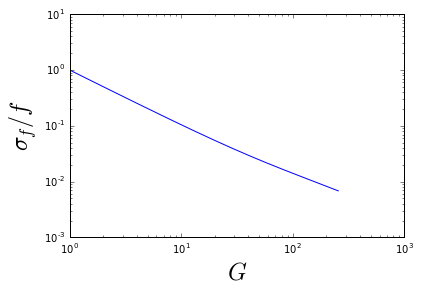

In [6]:
#or in a log scale
plt.loglog(G, sigmaf/f)
plt.ylabel(r"$\sigma_f/f$", fontsize=24)
plt.xlabel(r"$G$", fontsize=24)

So, in the **worst case**, where you are off by a full pixel in every color channel, your greenness might be off by 10% at $G=10$. At $G=100$ your greenness is off by around 1%. In a more likely scenario, your pixel values are all off by approximately 0.5, which means that the ratio $\sigma_f/f$ would go down by a factor of 2, so that means that your greenness is off by 5% at $G=10$ and by 0.5% at $G=100$.

Past this point I don't know how much this might affect your results. Since you take daily averages the roundoff error will tend to average to 0.5, and so each of your points could be scattered up/down by the amount in the graph. I would imagine that this would amount to an ~1% affect on the green-up time scale in the worst case. So if the green-up time was 50 days then you would be off by about 0.5 days.

What if something had a whole lot less $R$ and $B$, though?

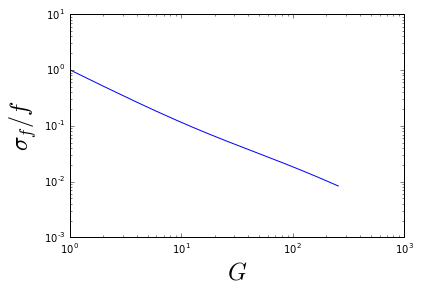

In [7]:
#If something has not a whole lot of R and B though, could this get worse?
R = 30.
B = 30.

#Calculate f, the "greenness"
f = f_function(G, R, B)
sigmaf = sigmaf_function(G, R, B)

#Plot
plt.loglog(G, sigmaf/f)
plt.ylabel(r"$\sigma_f/f$", fontsize=24)
plt.xlabel(r"$G$", fontsize=24)

Not really. The scales are still very simlar, as before